In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
orders = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\orders.csv")
orders.head(5)

order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

In [3]:
order_details = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\order_details.csv")
order_details.head(5)

order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

In [4]:
pizza_types = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\pizza_types.csv", index_col=None, header=0, encoding='unicode_escape')
pizza_types.head(5)

pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...

In [5]:
pizzas = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\pizzas.csv")
pizzas.head(5)

pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

In [6]:
orders_final_tb = order_details.merge(orders, how="inner", on=["order_id"])
orders_final_tb.head(5)

order_details_id  order_id       pizza_id  quantity        date      time
0                 1         1     hawaiian_m         1  2015-01-01  11:38:36
1                 2         2  classic_dlx_m         1  2015-01-01  11:57:40
2                 3         2  five_cheese_l         1  2015-01-01  11:57:40
3                 4         2    ital_supr_l         1  2015-01-01  11:57:40
4                 5         2     mexicana_m         1  2015-01-01  11:57:40

In [7]:
orders_pizza = orders_final_tb.merge(pizzas, how="inner", on=["pizza_id"])
orders_pizza.head()

order_details_id  order_id    pizza_id  quantity        date      time  \
0                 1         1  hawaiian_m         1  2015-01-01  11:38:36   
1               179        77  hawaiian_m         1  2015-01-02  12:22:46   
2               357       146  hawaiian_m         1  2015-01-03  14:22:10   
3               389       163  hawaiian_m         1  2015-01-03  16:54:54   
4               568       247  hawaiian_m         1  2015-01-04  20:55:29   

  pizza_type_id size  price  
0      hawaiian    M  13.25  
1      hawaiian    M  13.25  
2      hawaiian    M  13.25  
3      hawaiian    M  13.25  
4      hawaiian    M  13.25

In [8]:
df = orders_pizza.merge(pizza_types, how="inner", on=["pizza_type_id"])
df.head()

order_details_id  order_id    pizza_id  quantity        date      time  \
0                 1         1  hawaiian_m         1  2015-01-01  11:38:36   
1               179        77  hawaiian_m         1  2015-01-02  12:22:46   
2               357       146  hawaiian_m         1  2015-01-03  14:22:10   
3               389       163  hawaiian_m         1  2015-01-03  16:54:54   
4               568       247  hawaiian_m         1  2015-01-04  20:55:29   

  pizza_type_id size  price                name category  \
0      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
1      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
2      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
3      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
4      hawaiian    M  13.25  The Hawaiian Pizza  Classic   

                                ingredients  
0  Sliced Ham, Pineapple, Mozzarella Cheese  
1  Sliced Ham, Pineapple, Mozzarella Cheese  
2  Sliced Ham, Pineapple, Mozzarella Cheese  
3  Sliced Ham, Pineapple, Mozzarella Cheese  
4  Sliced Ham, Pineapple, Mozzarella Cheese

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


***Convert date coloumn to datetime datatype***

In [10]:
df["date"] = pd.to_datetime(df["date"])

***Add month column from date column***

In [11]:
df["month"] = df["date"].dt.month

***extract hour, minutes and seconds from time column***

In [12]:
df[["hour", "mins", "secs"]] = df["time"].str.split(":", expand=True)

In [13]:
df.head()

order_details_id  order_id    pizza_id  quantity       date      time  \
0                 1         1  hawaiian_m         1 2015-01-01  11:38:36   
1               179        77  hawaiian_m         1 2015-01-02  12:22:46   
2               357       146  hawaiian_m         1 2015-01-03  14:22:10   
3               389       163  hawaiian_m         1 2015-01-03  16:54:54   
4               568       247  hawaiian_m         1 2015-01-04  20:55:29   

  pizza_type_id size  price                name category  \
0      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
1      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
2      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
3      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
4      hawaiian    M  13.25  The Hawaiian Pizza  Classic   

                                ingredients  month hour mins secs  
0  Sliced Ham, Pineapple, Mozzarella Cheese      1   11   38   36  
1  Sliced Ham, Pineapple, Mozzarella Cheese      1   12   22   46  
2  Sliced Ham, Pineapple, Mozzarella Cheese      1   14   22   10  
3  Sliced Ham, Pineapple, Mozzarella Cheese      1   16   54   54  
4  Sliced Ham, Pineapple, Mozzarella Cheese      1   20   55   29

### No. of orders do we have in each month

In [36]:
no_orders = df["month"].value_counts().sort_index()
no_orders

1     4156
2     3892
3     4186
4     4067
5     4239
6     4025
7     4301
8     4094
9     3819
10    3797
11    4185
12    3859
Name: month, dtype: int64

Text(0, 0.5, 'Count of orders')

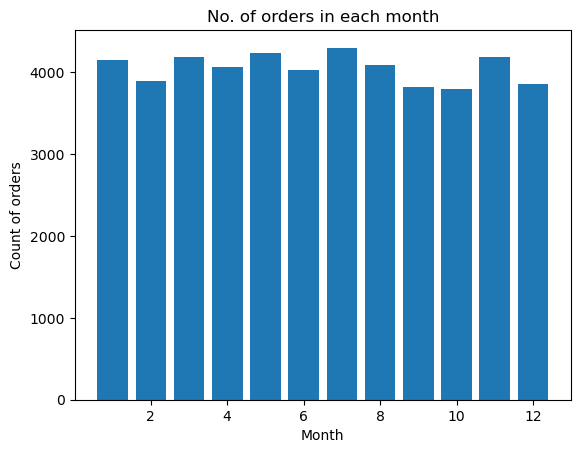

In [40]:
plt.bar(no_orders.index, no_orders.values)
plt.title("No. of orders in each month")
plt.xlabel("Month")
plt.ylabel("Count of orders")

#### Average customers each day

In [21]:
df["date"].value_counts().mean()

135.81005586592178

#### Peak hours

In [22]:
peak_hours = df["hour"].value_counts()
peak_hours

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: hour, dtype: int64

In [26]:
plt.bar(peak_hours.index, peak_hours.values)
plt.title("Peak hours in each day")
plt.xlabel("Hours")
plt.ylabel("Count of orders")

Text(0, 0.5, 'Count of orders')

#### No. of pizzas sold with respect to category of pizza

In [16]:
df["category"].value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

#### Most sold size of pizza

In [17]:
df["size"].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

#### Top 10 Bestseller pizzas

In [27]:
top_10_best = df["pizza_id"].value_counts()[:10]
top_10_best

big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
spicy_ital_l     1088
hawaiian_s       1001
southw_ckn_l      993
bbq_ckn_l         967
bbq_ckn_m         926
Name: pizza_id, dtype: int64

In [38]:
plt.bar(top_10_best.index, top_10_best.values)
plt.title("Top 10 Best seller pizza")
plt.xlabel("Pizza name")
plt.ylabel("Count of orders")
plt.xticks(rotation=90, ha='right', fontsize=12)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'big_meat_s'),
  Text(1, 0, 'thai_ckn_l'),
  Text(2, 0, 'five_cheese_l'),
  Text(3, 0, 'four_cheese_l'),
  Text(4, 0, 'classic_dlx_m'),
  Text(5, 0, 'spicy_ital_l'),
  Text(6, 0, 'hawaiian_s'),
  Text(7, 0, 'southw_ckn_l'),
  Text(8, 0, 'bbq_ckn_l'),
  Text(9, 0, 'bbq_ckn_m')])

#### Total revenue in the year

In [33]:
pizza_price = df["quantity"] * df["price"]
pizza_price.sum()

817860.05

#### pizzas we should take off the menu

In [45]:
least_sold_pizza = df["pizza_id"].value_counts()[-10:]
least_sold_pizza

spinach_supr_m    266
the_greek_l       255
ital_supr_s       194
ital_veggie_l     190
ckn_alfredo_l     187
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: pizza_id, dtype: int64

**THANK YOU**